<center>
<h1>Fake news detection using graph neural network</h1>
<h2>Graph Attention Network (GAT) GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import GATConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class GAT(torch.nn.Module):
    
    def __init__(self, num_n_feature, num_g_feature, emb_size):
        super(GAT, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.in_gat1_layer = GATConv(num_n_feature, emb_size, dropout = 0.25)
        self.gat2 = GATConv(emb_size, emb_size, dropout = 0.25)

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)

    def forward(self, x, edges_idx, batch_idx, g_features):

        x = self.in_gat1_layer(x, edges_idx)

        x = self.gat2(x, edges_idx)

        flatten = torch.cat([global_mean_pool(x, batch_idx),
                             global_max_pool(x, batch_idx)], axis=1)
        
        if g_features.size()[-1] > 1:
            g_ft = self.lin_g(g_features)
            flatten = torch.cat([flatten, g_ft], axis=1)

        out = self.act(self.out_layer(flatten))

        return out

# Training

In [5]:
models = train_all_and_optimize(GAT, datasets, epochs = 60)

[I 2022-01-03 15:51:01,146] A new study created in memory with name: no-name-fa7e544e-58f6-4c8a-9f7c-39eab4bd8453


--> Train on: origin


[I 2022-01-03 15:52:04,467] Trial 0 finished with value: 0.8422181372549019 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 160}. Best is trial 0 with value: 0.8422181372549019.
[I 2022-01-03 15:52:22,598] Trial 1 finished with value: 0.6995251225490197 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8422181372549019.
[I 2022-01-03 15:52:44,047] Trial 2 finished with value: 0.8754595588235294 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 2 with value: 0.8754595588235294.
[I 2022-01-03 15:53:11,809] Trial 3 finished with value: 0.8561580882352942 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 2 with value: 0.8754595588235294.
[I 2022-01-03 15:53:29,494] Trial 4 finished with value: 0.71

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.282199137740665  loss_val=0.25317622125148775 | acc_train=0.8826593137254902  acc_val=0.9139705882352942
Epochs: 20 | loss_train=0.2683785441848967  loss_val=0.21507730484008789 | acc_train=0.8878676470588236  acc_val=0.9257352941176471
Epochs: 30 | loss_train=0.24262140691280365  loss_val=0.2650303184986115 | acc_train=0.8905739379084968  acc_val=0.8987132352941176
Epochs: 40 | loss_train=0.25234639313485885  loss_val=0.3181836366653442 | acc_train=0.8895016339869282  acc_val=0.8690257352941175
Epochs: 50 | loss_train=0.23911595344543457  loss_val=0.21859929263591765 | acc_train=0.893841911764706  acc_val=0.9108455882352942
Epochs: 60 | loss_train=0.23060754934946695  loss_val=0.23424085974693298 | acc_train=0.8925142973856209  acc_val=0.9226102941176471


[I 2022-01-03 15:58:37,795] A new study created in memory with name: no-name-59c86efb-a33a-4ab9-8233-2119245938d4


--> Train on: dataset1


[I 2022-01-03 16:00:02,603] Trial 0 finished with value: 0.8291360294117647 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8291360294117647.
[I 2022-01-03 16:01:34,548] Trial 1 finished with value: 0.7171415441176471 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.8291360294117647.
[I 2022-01-03 16:03:03,149] Trial 2 finished with value: 0.8150735294117647 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8291360294117647.
[I 2022-01-03 16:04:04,055] Trial 3 finished with value: 0.6253446691176471 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8291360294117647.
[I 2022-01-03 16:04:54,424] Trial 4 finished with value: 

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.4843875666459401  loss_val=0.5010951459407806 | acc_train=0.7860498366013071  acc_val=0.7536764705882353
Epochs: 20 | loss_train=0.431777771976259  loss_val=0.36644095182418823 | acc_train=0.8178615196078431  acc_val=0.8237132352941176
Epochs: 30 | loss_train=0.4050552381409539  loss_val=0.371640744805336 | acc_train=0.8306270424836601  acc_val=0.8542279411764706
Epochs: 40 | loss_train=0.3398112456003825  loss_val=0.4242355227470398 | acc_train=0.8620302287581699  acc_val=0.8397058823529411
Epochs: 50 | loss_train=0.415194571018219  loss_val=0.38646034598350526 | acc_train=0.8382352941176471  acc_val=0.8178308823529411
Epochs: 60 | loss_train=0.33229850067032707  loss_val=0.3552393734455109 | acc_train=0.870608660130719  acc_val=0.8565257352941176


[I 2022-01-03 16:17:21,157] A new study created in memory with name: no-name-cfa1b4e4-a684-4287-9713-e1c85fc09a25


--> Train on: dataset2


[I 2022-01-03 16:18:30,787] Trial 0 finished with value: 0.8365808823529411 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8365808823529411.
[I 2022-01-03 16:19:51,458] Trial 1 finished with value: 0.8200827205882352 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8365808823529411.
[I 2022-01-03 16:20:49,515] Trial 2 finished with value: 0.8337928921568628 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8365808823529411.
[I 2022-01-03 16:22:21,261] Trial 3 finished with value: 0.8357077205882352 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.8365808823529411.
[I 2022-01-03 16:23:11,712] Trial 4 finished with value: 0.

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.4462430675824483  loss_val=0.49772565364837645 | acc_train=0.803155637254902  acc_val=0.7306985294117647
Epochs: 20 | loss_train=0.4094790551397536  loss_val=0.43667911887168886 | acc_train=0.856158088235294  acc_val=0.8717830882352942
Epochs: 30 | loss_train=0.4770122336016761  loss_val=0.444483208656311 | acc_train=0.8381331699346405  acc_val=0.8804227941176471
Epochs: 40 | loss_train=0.3470813300874498  loss_val=0.28952663838863374 | acc_train=0.8662683823529412  acc_val=0.8761029411764707
Epochs: 50 | loss_train=0.31466957264476353  loss_val=0.3354333251714706 | acc_train=0.8731107026143792  acc_val=0.8866727941176471
Epochs: 60 | loss_train=0.26996367341942257  loss_val=0.2525761812925339 | acc_train=0.8901654411764706  acc_val=0.8897977941176471


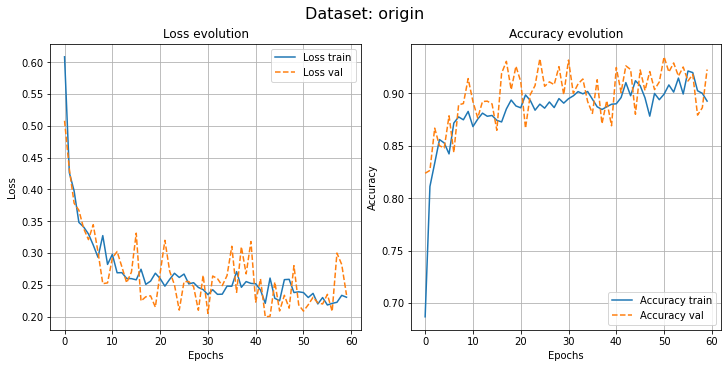

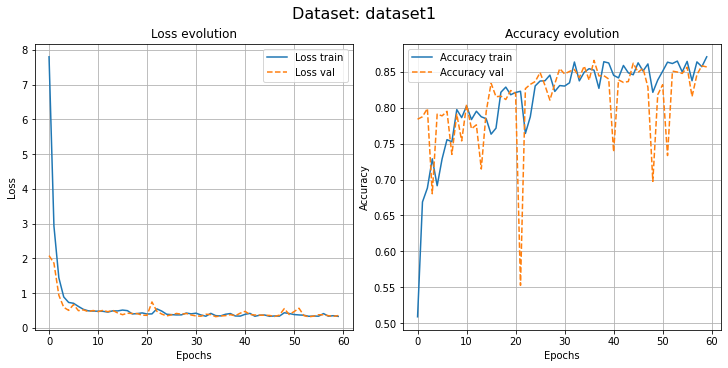

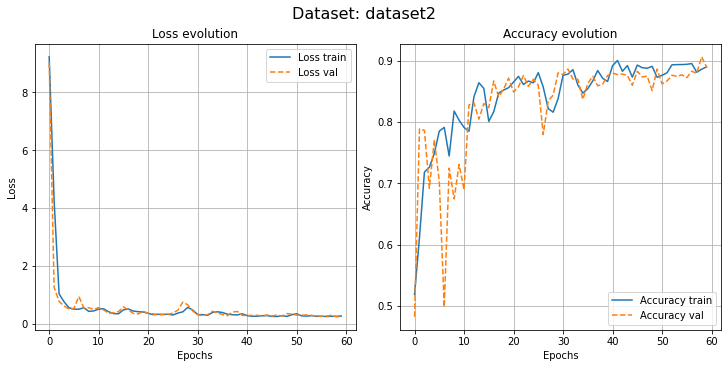

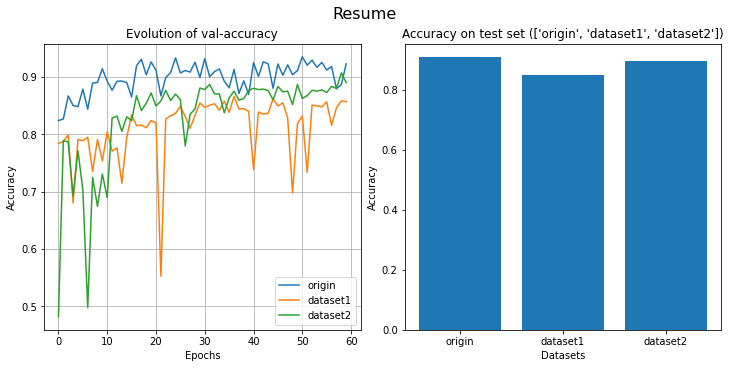

In [6]:
plot_hist(models)

# Save the three models

In [9]:
path = '../models/GAT/'
for name, model, _, _ in models:
    torch.save(model, f'{path}GAT_{name}')